This notebook is by Anastasia Ruzmaikina. Here I describe three different trading strategies involving the index data for SP500 index.

In [1]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("IndexData.xlsx")

# Write the DataFrame to a CSV file
df.to_csv("IndexData.csv", index=False) 

These are the descriptions of column names

In [2]:
df1 = pd.read_csv('IndexData.csv')
df1

,Fields,Descr
0,Index Change,The specific index that is being changed
1,Ticker,Symbol that is associated with this index event
2,Announced,The date on which the upcoming change was anno...
3,Trade Date,The effective date when the index change will ...
4,Action,The specific action being taken for the stock ...
5,Last Px,Last price of the stock before the announcement
6,Sector,The stocks sector (can be used to determine he...
7,Shs to trade,The amount of shares that need to be bought or...
8,$MM to Trade,Last Px * Shs to Trade
9,ADV to Trade,Compares average daily volume (ADV) to Shs to ...


This is the second page of Excel file with all the data downloaded as csv file.

In [3]:
df = pd.read_csv("IndexAddEventData.csv")
df

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,7/23/2024,7/30/2024,S&P 600,SNDR US,Add,$24.45,Industrials,"5,115,943",125.1,653%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/23/2024,7/25/2024,S&P 400,AVTR US,Add,$21.17,Healthcare,"74,808,923","1,583.70",1048%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/16/2024,7/19/2024,S&P 600,GTES US,Add,$16.97,Industrials,"25,154,971",426.9,997%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/27/2024,7/2/2024,S&P 600,PTGX US,Add,$31.88,Healthcare,"7,780,892",248.1,1167%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/20/2024,6/27/2024,S&P 400,RYAN US,Add,$55.36,Financials,"11,252,459",622.9,1932%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove empty columns

In [4]:
df = df.iloc[:, :10]
df

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade
0,7/23/2024,7/30/2024,S&P 600,SNDR US,Add,$24.45,Industrials,"5,115,943",125.1,653%
1,7/23/2024,7/25/2024,S&P 400,AVTR US,Add,$21.17,Healthcare,"74,808,923","1,583.70",1048%
2,7/16/2024,7/19/2024,S&P 600,GTES US,Add,$16.97,Industrials,"25,154,971",426.9,997%
3,6/27/2024,7/2/2024,S&P 600,PTGX US,Add,$31.88,Healthcare,"7,780,892",248.1,1167%
4,6/20/2024,6/27/2024,S&P 400,RYAN US,Add,$55.36,Financials,"11,252,459",622.9,1932%
...,...,...,...,...,...,...,...,...,...,...
845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove empty rows

In [5]:
df = df.dropna()

In [6]:
df

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade
0,7/23/2024,7/30/2024,S&P 600,SNDR US,Add,$24.45,Industrials,"5,115,943",125.1,653%
1,7/23/2024,7/25/2024,S&P 400,AVTR US,Add,$21.17,Healthcare,"74,808,923","1,583.70",1048%
2,7/16/2024,7/19/2024,S&P 600,GTES US,Add,$16.97,Industrials,"25,154,971",426.9,997%
3,6/27/2024,7/2/2024,S&P 600,PTGX US,Add,$31.88,Healthcare,"7,780,892",248.1,1167%
4,6/20/2024,6/27/2024,S&P 400,RYAN US,Add,$55.36,Financials,"11,252,459",622.9,1932%
...,...,...,...,...,...,...,...,...,...,...
154,6/13/2022,6/15/2022,S&P 600,EYE,Add,$39.62,Cons Disc,"11,230,796",-,1617%
155,6/3/2022,6/7/2022,S&P 500,VICI,Add,$32.45,Real Estate,"146,440,651","$4,752.00",906%
156,5/12/2022,5/18/2022,S&P 400,IRT,Add,$22.44,Real Estate,"24,230,554",$543.70,689%
157,5/12/2022,5/18/2022,S&P 600,AOSL,Add,$33.20,Info Tech,"2,772,855",$92.10,468%


Separate data by the Index type

In [7]:
df_sorted = df.sort_values(by=['Index Change', 'Sector', 'Ticker'])
df_sorted

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade
124,9/27/2022,9/30/2022,S&P 400,FYBR,Add,$22.22,Comm Svcs,"24,463,474",$543.60,2750%
116,11/28/2022,11/30/2022,S&P 400,NXST US,Add,$174.63,Comm Svcs,"4,257,991",743.6,889%
70,6/5/2023,6/16/2023,S&P 400,ZI,Add,$26.45,Communication Services,"30,320,541",802,614%
30,11/2/2023,11/6/2023,S&P 400,BURL US,Add,$126.26,Cons Disc,"7,144,767",902.1,575%
12,4/17/2024,4/19/2024,S&P 400,DUOL US,Add,$194.66,Cons Disc,"3,934,200",765.8,798%
...,...,...,...,...,...,...,...,...,...,...
144,7/18/2022,7/20/2022,S&P 600,SHO,Add,$10.01,Real Estate,"29,638,721",$296.70,883%
79,3/28/2023,3/30/2023,S&P 600,STHOV US,Add,$20.00,Real Estate,-,-,-
26,11/27/2023,11/29/2023,S&P 600,CWEN US,Add,$22.87,Utilities,"11,032,309",252.3,1092%
27,11/27/2023,11/29/2023,S&P 600,CWEN.A US,Add,$21.29,Utilities,"4,635,161",98.7,2107%


In [8]:
#!pip install yfinance
import pandas as pd
import numpy as np
import yfinance as yf

Make a new dataframe with just SP600 data

In [9]:
df_sorted_600 = df_sorted[df_sorted.loc[:, 'Index Change'] == 'S&P 600']
df_sorted_600

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade
10,5/1/2024,5/3/2024,S&P 600,IAC US,Add,$47.85,Comm Svcs,"9,408,854",450.2,1783%
48,7/27/2023,7/31/2023,S&P 600,MSGS US,Add,$190.10,Comm Svcs,"2,356,410",448,1874%
21,12/27/2023,12/29/2023,S&P 600,SATS US,Add,$15.08,Comm Svcs,"4,591,844",69.2,443%
56,6/5/2023,6/16/2023,S&P 600,CARG,Add,$19.50,Communication Services,"11,543,989",225.1,965%
43,8/21/2023,8/24/2023,S&P 600,AAP US,Add,$68.20,Cons Disc,"8,213,779",560.2,422%
...,...,...,...,...,...,...,...,...,...,...
144,7/18/2022,7/20/2022,S&P 600,SHO,Add,$10.01,Real Estate,"29,638,721",$296.70,883%
79,3/28/2023,3/30/2023,S&P 600,STHOV US,Add,$20.00,Real Estate,-,-,-
26,11/27/2023,11/29/2023,S&P 600,CWEN US,Add,$22.87,Utilities,"11,032,309",252.3,1092%
27,11/27/2023,11/29/2023,S&P 600,CWEN.A US,Add,$21.29,Utilities,"4,635,161",98.7,2107%


SP600 data, showing all the rows

In [10]:
pd.set_option('display.max_rows', None)
df_sorted_600

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade
10,5/1/2024,5/3/2024,S&P 600,IAC US,Add,$47.85,Comm Svcs,"9,408,854",450.2,1783%
48,7/27/2023,7/31/2023,S&P 600,MSGS US,Add,$190.10,Comm Svcs,"2,356,410",448,1874%
21,12/27/2023,12/29/2023,S&P 600,SATS US,Add,$15.08,Comm Svcs,"4,591,844",69.2,443%
56,6/5/2023,6/16/2023,S&P 600,CARG,Add,$19.50,Communication Services,"11,543,989",225.1,965%
43,8/21/2023,8/24/2023,S&P 600,AAP US,Add,$68.20,Cons Disc,"8,213,779",560.2,422%
154,6/13/2022,6/15/2022,S&P 600,EYE,Add,$39.62,Cons Disc,"11,230,796",-,1617%
148,6/28/2022,7/5/2022,S&P 600,FTDR,Add,$22.12,Cons Disc,"11,196,959",$247.70,725%
146,7/13/2022,7/19/2022,S&P 600,GRBK,Add,$21.71,Cons Disc,"6,240,593",$135.50,1297%
129,9/23/2022,9/27/2022,S&P 600,LESL,Add,$13.45,Cons Disc,"20,014,112",$269.20,1495%
149,6/28/2022,7/1/2022,S&P 600,LRN,Add,$37.77,Cons Disc,"5,795,597",$218.90,913%


Download values of SP600 Index from yfinance.

In [11]:
spy_600_df = yf.download('^SP600', start='2022-05-01', end='2024-10-24')

[*********************100%%**********************]  1 of 1 completed


In [12]:
spy_600_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02,1215.119995,1230.109985,1198.020020,1223.459961,1223.459961,415200
2022-05-03,1223.630005,1239.660034,1217.810059,1234.430054,1234.430054,380800
2022-05-04,1238.689941,1269.750000,1224.160034,1267.209961,1267.209961,428100
2022-05-05,1259.199951,1259.199951,1207.459961,1221.760010,1221.760010,434900
2022-05-06,1218.810059,1222.140015,1196.060059,1208.750000,1208.750000,411900


Make a new dataframe containing only SP400 data.

In [13]:
df_sorted_400 = df_sorted[df_sorted.loc[:, 'Index Change'] == 'S&P 400']
df_sorted_400

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade
124,9/27/2022,9/30/2022,S&P 400,FYBR,Add,$22.22,Comm Svcs,"24,463,474",$543.60,2750%
116,11/28/2022,11/30/2022,S&P 400,NXST US,Add,$174.63,Comm Svcs,"4,257,991",743.6,889%
70,6/5/2023,6/16/2023,S&P 400,ZI,Add,$26.45,Communication Services,"30,320,541",802,614%
30,11/2/2023,11/6/2023,S&P 400,BURL US,Add,$126.26,Cons Disc,"7,144,767",902.1,575%
12,4/17/2024,4/19/2024,S&P 400,DUOL US,Add,$194.66,Cons Disc,"3,934,200",765.8,798%
31,10/17/2023,10/19/2023,S&P 400,FND US,Add,$84.91,Cons Disc,"11,698,086",993.3,765%
35,10/9/2023,10/11/2023,S&P 400,H US,Add,$104.46,Cons Disc,"5,050,135",527.5,766%
47,8/1/2023,8/3/2023,S&P 400,PAG US,Add,$162.61,Cons Disc,"2,663,745",433.2,921%
138,8/4/2022,8/9/2022,S&P 400,CELH,Add,$108.41,Cons Stap,"4,220,121",$457.50,327%
82,3/6/2023,3/17/2023,S&P 400,ALV,Add,$95.08,Consumer Discretionary,"8,483,812",806.6,820%


Display all of the rows of SP400 dataframe

In [14]:
pd.set_option('display.max_rows', None)
df_sorted_400

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade
124,9/27/2022,9/30/2022,S&P 400,FYBR,Add,$22.22,Comm Svcs,"24,463,474",$543.60,2750%
116,11/28/2022,11/30/2022,S&P 400,NXST US,Add,$174.63,Comm Svcs,"4,257,991",743.6,889%
70,6/5/2023,6/16/2023,S&P 400,ZI,Add,$26.45,Communication Services,"30,320,541",802,614%
30,11/2/2023,11/6/2023,S&P 400,BURL US,Add,$126.26,Cons Disc,"7,144,767",902.1,575%
12,4/17/2024,4/19/2024,S&P 400,DUOL US,Add,$194.66,Cons Disc,"3,934,200",765.8,798%
31,10/17/2023,10/19/2023,S&P 400,FND US,Add,$84.91,Cons Disc,"11,698,086",993.3,765%
35,10/9/2023,10/11/2023,S&P 400,H US,Add,$104.46,Cons Disc,"5,050,135",527.5,766%
47,8/1/2023,8/3/2023,S&P 400,PAG US,Add,$162.61,Cons Disc,"2,663,745",433.2,921%
138,8/4/2022,8/9/2022,S&P 400,CELH,Add,$108.41,Cons Stap,"4,220,121",$457.50,327%
82,3/6/2023,3/17/2023,S&P 400,ALV,Add,$95.08,Consumer Discretionary,"8,483,812",806.6,820%


Download from yfinance the data on SP400 index

In [15]:
spy_400_df = yf.download('^SP400', start='2022-05-01', end='2024-10-24')

[*********************100%%**********************]  1 of 1 completed


In [16]:
spy_400_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02,2500.260010,2527.530029,2461.129883,2515.139893,2515.139893,0
2022-05-03,2515.139893,2551.310059,2512.459961,2539.209961,2539.209961,0
2022-05-04,2539.209961,2612.590088,2518.020020,2610.060059,2610.060059,0
2022-05-05,2610.060059,2610.060059,2490.000000,2514.750000,2514.750000,0
2022-05-06,2514.750000,2514.750000,2450.439941,2480.949951,2480.949951,0


Download from yfinance the data on SP500 Index

In [17]:
spy_ohlc_df = yf.download('SPY', start='2022-05-01', end='2024-10-24')

[*********************100%%**********************]  1 of 1 completed


In [18]:
spy_ohlc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02,412.070007,415.920013,405.019989,414.480011,399.240204,158312500
2022-05-03,415.010010,418.929993,413.359985,416.380005,401.070404,100028200
2022-05-04,417.079987,429.660004,413.709991,429.059998,413.284210,144247900
2022-05-05,424.549988,425.000000,409.440002,413.809998,398.594910,172929100
2022-05-06,411.100006,414.799988,405.730011,411.339996,396.215729,151770800


Separate the Close prices of SP500 from 05/01/2022 till 10/24/2024

In [19]:
df500 = spy_ohlc_df.Close
df500

Date
2022-05-02    414.480011
2022-05-03    416.380005
2022-05-04    429.059998
2022-05-05    413.809998
2022-05-06    411.339996
2022-05-09    398.170013
2022-05-10    399.089996
2022-05-11    392.750000
2022-05-12    392.339996
2022-05-13    401.720001
2022-05-16    400.089996
2022-05-17    408.320007
2022-05-18    391.859985
2022-05-19    389.459991
2022-05-20    389.630005
2022-05-23    396.920013
2022-05-24    393.890015
2022-05-25    397.369995
2022-05-26    405.309998
2022-05-27    415.260010
2022-05-31    412.929993
2022-06-01    409.589996
2022-06-02    417.390015
2022-06-03    410.540009
2022-06-06    411.790009
2022-06-07    415.739990
2022-06-08    411.220001
2022-06-09    401.440002
2022-06-10    389.799988
2022-06-13    375.000000
2022-06-14    373.869995
2022-06-15    379.200012
2022-06-16    366.649994
2022-06-17    365.859985
2022-06-21    375.070007
2022-06-22    374.390015
2022-06-23    378.059998
2022-06-24    390.079987
2022-06-27    388.589996
2022-06-28    380.64

In [20]:
import matplotlib.pyplot as plt

Graph the close prices of SP500 vs the calendar date.

<Axes: xlabel='Date'>

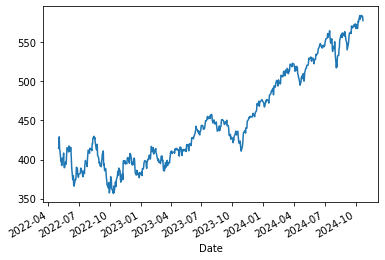

In [21]:
df500.plot()

From the given Excel dataset, make a new dataframe containing only the data for companies added to SP500.

In [22]:
df_sorted_500 = df_sorted[df_sorted.loc[:, 'Index Change'] == 'S&P 500']
df_sorted_500

,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade
32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%
36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-
97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%
37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-
42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%
13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-
121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%
117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%
51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-
105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-


Make a dictionary of Trade Prices (stock prices on Trade Day) for companies in the df_sorted_500 dataframe, using yfinance and in some cases Yahoo Finance Historical Data.

In [23]:
dict = {'LULU': 412.94, 'VLTO': 84.56, 'BG': 104.62, 'KLG': 14.68, 'KVUE': 23.66, 'GEV-W': 142.02,'TRGP': 85.5, 'ACGL': 86.68, 'FTRE': 34.01, 'GEHCV':56, 'PHIN-W':36.75, 'PODD': 312.77, 'SOLV-W': 69.1, 'MBC-W':9, 'FSLR': 155.08, 'PANW': 246.53, 'VICI': 32.11, 'PCG': 12.50  }

Add the stock prices on the Trade Date as a column 'Trade Px' to the df_sorted_500 dataframe.

In [24]:
df_sorted_500['Trade PX'] = list(dict.values())
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/3098197106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Trade PX'] = list(dict.values())


,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,Trade PX
32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%,412.94
36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-,84.56
97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%,104.62
37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-,14.68
42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%,23.66
13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-,142.02
121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%,85.50
117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%,86.68
51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-,34.01
105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-,56.00


Reset the index of df_sorted_500 dataframe

In [25]:
df_sorted_500.reset_index(inplace = True)
df_sorted_500

,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,Trade PX
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%,412.94
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-,84.56
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%,104.62
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-,14.68
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%,23.66
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-,142.02
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%,85.50
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%,86.68
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-,34.01
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-,56.00


Add a new column 'Delta' to be filled in later

In [26]:
df_sorted_500['Delta'] = df_sorted_500.index
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2231992391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Delta'] = df_sorted_500.index


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,Trade PX,Delta
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%,412.94,0
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-,84.56,1
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%,104.62,2
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-,14.68,3
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%,23.66,4
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-,142.02,5
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%,85.50,6
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%,86.68,7
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-,34.01,8
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-,56.00,9


Fill in the 'Delta' column to show the number of days between 'Announced' date and 'Trade Date'. This is needed when calculating the cost of holding the stock.

In [27]:
from datetime import datetime
#date1 = datetime(2023, 1, 1)
#date2 = datetime(2023, 12, 31)

# Calculate the difference between the two dates
#delta = date2 - date1

# Extract the number of days
#days_difference = delta.days
from datetime import datetime
for i in range(len(df_sorted_500)):
    df_sorted_500.loc[i,'Delta'] = (datetime.strptime(df_sorted_500.loc[i,'Trade Date'], "%m/%d/%Y") - datetime.strptime(df_sorted_500.loc[i,'Announced'], "%m/%d/%Y")).days
df_sorted_500

,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,Trade PX,Delta
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%,412.94,4
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-,84.56,1
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%,104.62,1
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-,14.68,1
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%,23.66,3
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-,142.02,5
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%,85.50,5
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%,86.68,4
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-,34.01,2
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-,56.00,6


Make a new column 'Announcement Px' which shows the price of stock on annoucement date 'Last Px' but as an integer.

In [28]:
df_sorted_500['Announcement Px'] = df_sorted_500['Last Px']
#print(df_sorted_500)

df_sorted_500['Announcement Px'] = df_sorted_500['Announcement Px'].str[1:]
    
df_sorted_500['Announcement Px'] = df_sorted_500['Announcement Px'].astype(float)
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/833200971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Announcement Px'] = df_sorted_500['Last Px']
/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/833200971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Announcement Px'] = df_sorted_500['Announcement Px'].str[1:]
/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/833200971.py:6: SettingWithCopyWarning: 
A value is tryin

,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,Trade PX,Delta,Announcement Px
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%,412.94,4,377.69
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-,84.56,1,84.65
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%,104.62,1,91.39
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-,14.68,1,16.00
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%,23.66,3,22.90
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-,142.02,5,131.25
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%,85.50,5,70.44
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%,86.68,4,51.69
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-,34.01,2,34.26
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-,56.00,6,57.50


Make a new column '$Gain' to show the change in price of the stock between Announcement date and Trade date.

In [29]:
df_sorted_500['$Gain'] = df_sorted_500['Trade PX'] - df_sorted_500['Announcement Px']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2633235835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['$Gain'] = df_sorted_500['Trade PX'] - df_sorted_500['Announcement Px']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,Trade PX,Delta,Announcement Px,$Gain
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%,412.94,4,377.69,35.25
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-,84.56,1,84.65,-0.09
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%,104.62,1,91.39,13.23
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-,14.68,1,16.00,-1.32
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%,23.66,3,22.90,0.76
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-,142.02,5,131.25,10.77
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%,85.50,5,70.44,15.06
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%,86.68,4,51.69,34.99
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-,34.01,2,34.26,-0.25
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-,56.00,6,57.50,-1.50


Make a dictionary of 20-day Average Daily Volume for each of the stocks in df_sorted_500 dataframe.

In [30]:
dictV = {'LULU': 3988618.75, 'VLTO': 3412000, 'BG': 4638593.3, 'KLG': 2842300, 'KVUE': 90099685.7, 'GEV-W': 8376800,'TRGP': 1453878.57, 'ACGL': 2340646.6, 'FTRE': 3454200, 'GEHCV': 5819800, 'PHIN-W':1388400, 'PODD': 2184292.86, 'SOLV-W': 2894600, 'MBC-W':4887900, 'FSLR': 3671528.57, 'PANW': 10005121.43, 'VICI': 36506438.46, 'PCG': 65138085.7}

Add this ADV value for each stock (obtained from yfinance and Yahoo Finance Historical Data) as the column 'ADV' into the df_sorted_500 dataframe.

In [31]:
df_sorted_500['ADV'] = list(dictV.values())
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/3406992206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['ADV'] = list(dictV.values())


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,Trade PX,Delta,Announcement Px,$Gain,ADV
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%,412.94,4,377.69,35.25,3988618.75
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-,84.56,1,84.65,-0.09,3412000.00
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%,104.62,1,91.39,13.23,4638593.30
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-,14.68,1,16.00,-1.32,2842300.00
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%,23.66,3,22.90,0.76,90099685.70
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-,142.02,5,131.25,10.77,8376800.00
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%,85.50,5,70.44,15.06,1453878.57
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%,86.68,4,51.69,34.99,2340646.60
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-,34.01,2,34.26,-0.25,3454200.00
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-,56.00,6,57.50,-1.50,5819800.00


Make a column 'double' showing 1 if only one stock was added to SP500 during the time period, and showing 2 if two stocks were added to SP500 during the time period.

In [32]:
arr = [1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,1, 1, 1]
df_sorted_500['double'] = arr

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2868616306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['double'] = arr


We calculate maximum number of shares to trade by assuming that we spend 4,900,000 total. We divide this by the last known price of one share (and by 2 in the case when two stocks were added at the same time period). We store calculated values in the column 'Max Shares to Trade'. Next which choose the smaller number between 'Max Shares to Trade' and 1% of ADV and store it in the column 'Shares Long'. We assume that all trades between Announcement date and Trade Date are long trades, and we calculate the total gain on trading all of the shares by multiplying 'Shares Long' by gain per share '$Gain'. We store the resulting total gain on all traded shares in the column 'Gain on 1\% ADV'.

In [33]:
df_sorted_500['Max Shares to Trade'] = 4900000/(df_sorted_500['Announcement Px'] * df_sorted_500['double'])
df_sorted_500['Shares Long'] = df_sorted_500.apply(lambda row: min(0.01*row['ADV'], row['Max Shares to Trade']), axis=1)
df_sorted_500['Gain on 1% ADV'] = df_sorted_500['$Gain']*df_sorted_500['Shares Long']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2008885475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Max Shares to Trade'] = 4900000/(df_sorted_500['Announcement Px'] * df_sorted_500['double'])
/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2008885475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Shares Long'] = df_sorted_500.apply(lambda row: min(0.01*row['ADV'], row['Max Shares to Trade']), axis=1)
/var/folders/p8/d6td9k4s2tn

,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,ADV to Trade,Trade PX,Delta,Announcement Px,$Gain,ADV,double,Max Shares to Trade,Shares Long,Gain on 1% ADV
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",1483%,412.94,4,377.69,35.25,3988618.75,1,12973.602690,12973.602690,457319.494824
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,-,84.56,1,84.65,-0.09,3412000.00,2,28942.705257,28942.705257,-2604.843473
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",2438%,104.62,1,91.39,13.23,4638593.30,2,26808.184703,26808.184703,354672.283620
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,-,14.68,1,16.00,-1.32,2842300.00,2,153125.000000,28423.000000,-37518.360000
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",881%,23.66,3,22.90,0.76,90099685.70,1,213973.799127,213973.799127,162620.087336
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,-,142.02,5,131.25,10.77,8376800.00,2,18666.666667,18666.666667,201040.000000
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,1152%,85.50,5,70.44,15.06,1453878.57,1,69562.748438,14538.785700,218954.112642
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",3159%,86.68,4,51.69,34.99,2340646.60,1,94795.898626,23406.466000,818992.245340
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,-,34.01,2,34.26,-0.25,3454200.00,2,71511.967309,34542.000000,-8635.500000
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,-,56.00,6,57.50,-1.50,5819800.00,1,85217.391304,58198.000000,-87297.000000


We make a list of all FFE Rates (yearly) during Announcement Date - Trade Date periods from the FRED website and store it in the FFERate column.

In [34]:
#cost = []
rate = [0.0533, 0.0533, 0.0465, 0.0533, 0.0533, 0.0533, 0.0308, 0.0308, 0.0508, 0.041, 0.0508, 0.0465, 0.0533, 0.0410, 0.0410, 0.0508, 0.0121, 0.0256]
df_sorted_500['FFERate'] = rate
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2447955629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['FFERate'] = rate


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Trade PX,Delta,Announcement Px,$Gain,ADV,double,Max Shares to Trade,Shares Long,Gain on 1% ADV,FFERate
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,412.94,4,377.69,35.25,3988618.75,1,12973.602690,12973.602690,457319.494824,0.0533
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,84.56,1,84.65,-0.09,3412000.00,2,28942.705257,28942.705257,-2604.843473,0.0533
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,104.62,1,91.39,13.23,4638593.30,2,26808.184703,26808.184703,354672.283620,0.0465
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,14.68,1,16.00,-1.32,2842300.00,2,153125.000000,28423.000000,-37518.360000,0.0533
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,23.66,3,22.90,0.76,90099685.70,1,213973.799127,213973.799127,162620.087336,0.0533
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,142.02,5,131.25,10.77,8376800.00,2,18666.666667,18666.666667,201040.000000,0.0533
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,85.50,5,70.44,15.06,1453878.57,1,69562.748438,14538.785700,218954.112642,0.0308
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,86.68,4,51.69,34.99,2340646.60,1,94795.898626,23406.466000,818992.245340,0.0308
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,34.01,2,34.26,-0.25,3454200.00,2,71511.967309,34542.000000,-8635.500000,0.0508
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,56.00,6,57.50,-1.50,5819800.00,1,85217.391304,58198.000000,-87297.000000,0.0410


We calculate the cost of purchasing the shares at 0.01 per share and the cost of keeping long trades overnight for 'Delta' days. We assume that 4,900,000 was invested if only one stock was added during the time period and 4,900,000/2 was invested if two stocks were added during time period.

In [35]:
df_sorted_500['Cost Long'] = 4900000*((df_sorted_500['FFERate']+0.015)/365)*(df_sorted_500['Delta']/df_sorted_500['double']) + 2*0.01*df_sorted_500['Shares Long']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/843658903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Cost Long'] = 4900000*((df_sorted_500['FFERate']+0.015)/365)*(df_sorted_500['Delta']/df_sorted_500['double']) + 2*0.01*df_sorted_500['Shares Long']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Delta,Announcement Px,$Gain,ADV,double,Max Shares to Trade,Shares Long,Gain on 1% ADV,FFERate,Cost Long
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,4,377.69,35.25,3988618.75,1,12973.602690,12973.602690,457319.494824,0.0533,3927.088492
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,1,84.65,-0.09,3412000.00,2,28942.705257,28942.705257,-2604.843473,0.0533,1037.306160
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,1,91.39,13.23,4638593.30,2,26808.184703,26808.184703,354672.283620,0.0465,948.971913
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,1,16.00,-1.32,2842300.00,2,153125.000000,28423.000000,-37518.360000,0.0533,1026.912055
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,3,22.90,0.76,90099685.70,1,213973.799127,213973.799127,162620.087336,0.0533,7030.188311
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,5,131.25,10.77,8376800.00,2,18666.666667,18666.666667,201040.000000,0.0533,2665.593607
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,5,70.44,15.06,1453878.57,1,69562.748438,14538.785700,218954.112642,0.0308,3365.022289
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,4,51.69,34.99,2340646.60,1,94795.898626,23406.466000,818992.245340,0.0308,2927.526580
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,2,34.26,-0.25,3454200.00,2,71511.967309,34542.000000,-8635.500000,0.0508,1574.182466
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,6,57.50,-1.50,5819800.00,1,85217.391304,58198.000000,-87297.000000,0.0410,5674.644932


We subtract the cost of trading/keeping the stock from the total gain made on the long trade of stock between Announcement date and Trade Date. We record the result in the column '$Gain on Long'.

In [36]:
df_sorted_500['$Gain on Long'] = df_sorted_500['Gain on 1% ADV'] - df_sorted_500['Cost Long']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/1903287927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['$Gain on Long'] = df_sorted_500['Gain on 1% ADV'] - df_sorted_500['Cost Long']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Announcement Px,$Gain,ADV,double,Max Shares to Trade,Shares Long,Gain on 1% ADV,FFERate,Cost Long,$Gain on Long
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,377.69,35.25,3988618.75,1,12973.602690,12973.602690,457319.494824,0.0533,3927.088492,453392.406332
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,84.65,-0.09,3412000.00,2,28942.705257,28942.705257,-2604.843473,0.0533,1037.306160,-3642.149633
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,91.39,13.23,4638593.30,2,26808.184703,26808.184703,354672.283620,0.0465,948.971913,353723.311706
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,16.00,-1.32,2842300.00,2,153125.000000,28423.000000,-37518.360000,0.0533,1026.912055,-38545.272055
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,22.90,0.76,90099685.70,1,213973.799127,213973.799127,162620.087336,0.0533,7030.188311,155589.899025
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,131.25,10.77,8376800.00,2,18666.666667,18666.666667,201040.000000,0.0533,2665.593607,198374.406393
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,70.44,15.06,1453878.57,1,69562.748438,14538.785700,218954.112642,0.0308,3365.022289,215589.090353
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,51.69,34.99,2340646.60,1,94795.898626,23406.466000,818992.245340,0.0308,2927.526580,816064.718760
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,34.26,-0.25,3454200.00,2,71511.967309,34542.000000,-8635.500000,0.0508,1574.182466,-10209.682466
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,57.50,-1.50,5819800.00,1,85217.391304,58198.000000,-87297.000000,0.0410,5674.644932,-92971.644932


Now we can calculate the total gain of this strategy.

In [37]:
df_sorted_500['$Gain on Long'].sum()

2790463.0649002413

Now we are going to create a dataframe which contains only Trade Date and profit on that date.

In [38]:
df_profit = pd.DataFrame()
df_profit['Trade Date'] = df_sorted_500.index
df_profit['$Gain on Long'] = df_sorted_500['$Gain on Long']
from datetime import datetime
for i in range(len(df_sorted_500)):
    df_profit.loc[i,'Trade Date'] = datetime.strptime(df_sorted_500.loc[i,'Trade Date'], "%m/%d/%Y") 
df_profit


,Trade Date,$Gain on Long
0,2023-10-17 00:00:00,453392.406332
1,2023-09-29 00:00:00,-3642.149633
2,2023-03-14 00:00:00,353723.311706
3,2023-09-29 00:00:00,-38545.272055
4,2023-08-24 00:00:00,155589.899025
5,2024-04-01 00:00:00,198374.406393
6,2022-10-11 00:00:00,215589.090353
7,2022-10-31 00:00:00,816064.718760
8,2023-06-30 00:00:00,-10209.682466
9,2023-01-03 00:00:00,-92971.644932


We add profits that happened on the same date.

In [39]:
#!pip install dataframe_image
#!pip install jinja2==3.0.0
#!pip install reportlab

In [40]:
result = df_profit.groupby('Trade Date')['$Gain on Long'].sum().reset_index()
result['Cumulative_Sum'] = result['$Gain on Long'].cumsum()
result

,Trade Date,$Gain on Long,Cumulative_Sum
0,2022-06-07,-55815.787576,-5.581579e+04
1,2022-09-30,-54330.751589,-1.101465e+05
2,2022-10-11,215589.090353,1.054426e+05
3,2022-10-31,816064.718760,9.215073e+05
4,2022-12-14,22710.139178,9.442174e+05
5,2022-12-16,76424.306336,1.020642e+06
6,2023-01-03,-92971.644932,9.276701e+05
7,2023-03-14,635120.659226,1.562791e+06
8,2023-06-16,650488.535768,2.213279e+06
9,2023-06-30,-10209.682466,2.203070e+06


We export the result to pdf file

In [41]:
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib import colors

# Create a PDF file
pdf = SimpleDocTemplate("result.pdf", pagesize=letter)

# Create a table
table_data = [result.columns.tolist()] + result.values.tolist()
table = Table(table_data)

# Build the PDF
pdf.build([table])

We can graph total gains of this strategy vs time of trade.

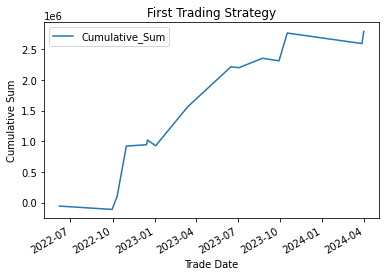

In [42]:
result.plot(x='Trade Date', y='Cumulative_Sum')
#result.plot(x='Trade Date', y='Cumulative_Sum')
plt.xlabel("Trade Date")
plt.ylabel("Cumulative Sum")

plt.title("First Trading Strategy")

plt.savefig('result_graph.pdf')
plt.show()

We export the resulting graph to a pdf file

We can look up yfinance data for SP500 between Trade Date and a date a week later and store the SP500 price on Trade date and change in SP500 price between Trade Date and a date one week later in a dictionary.

In [43]:
data_spy1 = yf.download("SPY", start="2022-09-23", end="2022-09-29").Close
print(data_spy1[-1] - data_spy1[0], data_spy1[0])

[*********************100%%**********************]  1 of 1 completed

2.579986572265625 367.95001220703125


In [44]:
dictSPY = {431.5: -5.07, 428.5: -3.86, 385.36: 4.63, 428.5: -3.86, 439.34: 0.63, 523.17: -3.76, 373.2: -16.64, 379.98: -8.97, 436.39: 7.4, 376.66:7.1, 436.39: 7.4, 385.91:10.2, 523.17:-3.76, 398.95:-15.68, 398.95:-15.68, 427.1:2.8, 410.54:-9.1, 367.95:2.58}

This shows all of the Announcement dates

In [45]:
df_sorted_500.Announced

0     10/13/2023
1      9/28/2023
2      3/13/2023
3      9/28/2023
4      8/21/2023
5      3/27/2024
6      10/6/2022
7     10/27/2022
8      6/28/2023
9     12/28/2022
10     6/28/2023
11     3/10/2023
12     3/27/2024
13    12/12/2022
14    12/12/2022
15      6/5/2023
16      6/3/2022
17     9/23/2022
Name: Announced, dtype: object

We look up the stock price a week after trade date using yfinance and Yahoo Finance Historical Data and store it in a dictionary.

In [46]:
dictS = {'LULU': 403.37, 'VLTO': 74.45, 'BG': 97.2, 'KLG': 10.39, 'KVUE': 22.96, 'GEV-W': 129.96,'TRGP': 87.51, 'ACGL': 85.41, 'FTRE': 32.22, 'GEHCV':60, 'PHIN-W':28.96, 'PODD': 326.03, 'SOLV-W': 70.06, 'MBC-W':7.54, 'FSLR': 156.75, 'PANW': 243.94, 'VICI': 28.13, 'PCG': 14.93  }

We store the stock price a week after Trade Date in a new column 'Week After Trade PX'.

In [47]:
df_sorted_500['Week After Trade PX'] = list(dictS.values())
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/3022219084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Week After Trade PX'] = list(dictS.values())


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,$Gain,ADV,double,Max Shares to Trade,Shares Long,Gain on 1% ADV,FFERate,Cost Long,$Gain on Long,Week After Trade PX
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,35.25,3988618.75,1,12973.602690,12973.602690,457319.494824,0.0533,3927.088492,453392.406332,403.37
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,-0.09,3412000.00,2,28942.705257,28942.705257,-2604.843473,0.0533,1037.306160,-3642.149633,74.45
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,13.23,4638593.30,2,26808.184703,26808.184703,354672.283620,0.0465,948.971913,353723.311706,97.20
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,-1.32,2842300.00,2,153125.000000,28423.000000,-37518.360000,0.0533,1026.912055,-38545.272055,10.39
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,0.76,90099685.70,1,213973.799127,213973.799127,162620.087336,0.0533,7030.188311,155589.899025,22.96
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,10.77,8376800.00,2,18666.666667,18666.666667,201040.000000,0.0533,2665.593607,198374.406393,129.96
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,15.06,1453878.57,1,69562.748438,14538.785700,218954.112642,0.0308,3365.022289,215589.090353,87.51
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,34.99,2340646.60,1,94795.898626,23406.466000,818992.245340,0.0308,2927.526580,816064.718760,85.41
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,-0.25,3454200.00,2,71511.967309,34542.000000,-8635.500000,0.0508,1574.182466,-10209.682466,32.22
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,-1.50,5819800.00,1,85217.391304,58198.000000,-87297.000000,0.0410,5674.644932,-92971.644932,60.00


For the second trading strategy, we perform long trades between Announcement date and Trade Date, and then perform a short/long trade between Trade Date and a date one week later.
To determine whether to perform a short or long trade we look at whether gain on one share between Annocement and Trade Date was positive or negative. In the new column 'Sign' we store positive as 1 and negative as -1.

In [48]:
df_sorted_500['Sign'] = np.sign(df_sorted_500['$Gain on Long'])
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/1388360879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Sign'] = np.sign(df_sorted_500['$Gain on Long'])


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,ADV,double,Max Shares to Trade,Shares Long,Gain on 1% ADV,FFERate,Cost Long,$Gain on Long,Week After Trade PX,Sign
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,3988618.75,1,12973.602690,12973.602690,457319.494824,0.0533,3927.088492,453392.406332,403.37,1.0
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,3412000.00,2,28942.705257,28942.705257,-2604.843473,0.0533,1037.306160,-3642.149633,74.45,-1.0
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,4638593.30,2,26808.184703,26808.184703,354672.283620,0.0465,948.971913,353723.311706,97.20,1.0
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,2842300.00,2,153125.000000,28423.000000,-37518.360000,0.0533,1026.912055,-38545.272055,10.39,-1.0
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,90099685.70,1,213973.799127,213973.799127,162620.087336,0.0533,7030.188311,155589.899025,22.96,1.0
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,8376800.00,2,18666.666667,18666.666667,201040.000000,0.0533,2665.593607,198374.406393,129.96,1.0
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,1453878.57,1,69562.748438,14538.785700,218954.112642,0.0308,3365.022289,215589.090353,87.51,1.0
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,2340646.60,1,94795.898626,23406.466000,818992.245340,0.0308,2927.526580,816064.718760,85.41,1.0
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,3454200.00,2,71511.967309,34542.000000,-8635.500000,0.0508,1574.182466,-10209.682466,32.22,-1.0
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,5819800.00,1,85217.391304,58198.000000,-87297.000000,0.0410,5674.644932,-92971.644932,60.00,-1.0


If the sign was +1 (the stock increased) we make a short trade between the Trade Date and the date a week after. If the sign was -1 (the stock decreased) we make a long trade between Trade Date and the date a week after. We record gain per share in the column '$Gain Week After'.

In [49]:
df_sorted_500['$Gain Week After'] = df_sorted_500['Sign']*(df_sorted_500['Trade PX'] - df_sorted_500['Week After Trade PX'])
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/3746818991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['$Gain Week After'] = df_sorted_500['Sign']*(df_sorted_500['Trade PX'] - df_sorted_500['Week After Trade PX'])


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,double,Max Shares to Trade,Shares Long,Gain on 1% ADV,FFERate,Cost Long,$Gain on Long,Week After Trade PX,Sign,$Gain Week After
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,1,12973.602690,12973.602690,457319.494824,0.0533,3927.088492,453392.406332,403.37,1.0,9.57
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,2,28942.705257,28942.705257,-2604.843473,0.0533,1037.306160,-3642.149633,74.45,-1.0,-10.11
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,2,26808.184703,26808.184703,354672.283620,0.0465,948.971913,353723.311706,97.20,1.0,7.42
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,2,153125.000000,28423.000000,-37518.360000,0.0533,1026.912055,-38545.272055,10.39,-1.0,-4.29
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,1,213973.799127,213973.799127,162620.087336,0.0533,7030.188311,155589.899025,22.96,1.0,0.70
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,2,18666.666667,18666.666667,201040.000000,0.0533,2665.593607,198374.406393,129.96,1.0,12.06
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,1,69562.748438,14538.785700,218954.112642,0.0308,3365.022289,215589.090353,87.51,1.0,-2.01
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,1,94795.898626,23406.466000,818992.245340,0.0308,2927.526580,816064.718760,85.41,1.0,1.27
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,2,71511.967309,34542.000000,-8635.500000,0.0508,1574.182466,-10209.682466,32.22,-1.0,-1.79
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,1,85217.391304,58198.000000,-87297.000000,0.0410,5674.644932,-92971.644932,60.00,-1.0,4.00


We calculate maximum number of shares we can trade by dividing 4,900,000 by price of one share on Trade Date if one stock is traded (and we divide by an additional factor of 2 if two stocks are traded.) We store the maximum number of shares in 'Max Shares to Short' column. To determine the actual number of shares traded we calculate the minimum of 1% of ADV and of 'Max Shares to Short' for each stock. We store the result in 'Shares Short' column. We calculate total amount made on each stock a week after Trade Date by multiplying '$Gain Week After' by 'Shares Short'. We store the result in 'Gain on 1\% ADV Short' column.

In [50]:
df_sorted_500['Max Shares to Short'] = 4900000/(df_sorted_500['Trade PX'] * df_sorted_500['double'])
df_sorted_500['Shares Short'] = df_sorted_500.apply(lambda row: min(0.01*row['ADV'], row['Max Shares to Short']), axis=1)
df_sorted_500['Gain on 1% ADV Short'] = df_sorted_500['$Gain Week After']*df_sorted_500['Shares Short']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/815928790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Max Shares to Short'] = 4900000/(df_sorted_500['Trade PX'] * df_sorted_500['double'])
/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/815928790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Shares Short'] = df_sorted_500.apply(lambda row: min(0.01*row['ADV'], row['Max Shares to Short']), axis=1)
/var/folders/p8/d6td9k4s2tndwtwl8kg

,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Gain on 1% ADV,FFERate,Cost Long,$Gain on Long,Week After Trade PX,Sign,$Gain Week After,Max Shares to Short,Shares Short,Gain on 1% ADV Short
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,457319.494824,0.0533,3927.088492,453392.406332,403.37,1.0,9.57,11866.130673,11866.130673,113558.870538
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,-2604.843473,0.0533,1037.306160,-3642.149633,74.45,-1.0,-10.11,28973.509934,28973.509934,-292922.185430
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,354672.283620,0.0465,948.971913,353723.311706,97.20,1.0,7.42,23418.084496,23418.084496,173762.186962
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,-37518.360000,0.0533,1026.912055,-38545.272055,10.39,-1.0,-4.29,166893.732970,28423.000000,-121934.670000
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,162620.087336,0.0533,7030.188311,155589.899025,22.96,1.0,0.70,207100.591716,207100.591716,144970.414201
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,201040.000000,0.0533,2665.593607,198374.406393,129.96,1.0,12.06,17251.091396,17251.091396,208048.162231
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,218954.112642,0.0308,3365.022289,215589.090353,87.51,1.0,-2.01,57309.941520,14538.785700,-29222.959257
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,818992.245340,0.0308,2927.526580,816064.718760,85.41,1.0,1.27,56529.764652,23406.466000,29726.211820
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,-8635.500000,0.0508,1574.182466,-10209.682466,32.22,-1.0,-1.79,72037.635989,34542.000000,-61830.180000
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,-87297.000000,0.0410,5674.644932,-92971.644932,60.00,-1.0,4.00,87500.000000,58198.000000,232792.000000


We calculate the cost of storing shares for 6 nights taking into account whether the trade was short or long. We add the cost of 0.01 per traded share. We store the result in 'Cost Short' column.

In [51]:
df_sorted_500['Cost Short'] = 4900000*((df_sorted_500['FFERate']+0.0125 - 0.0025*df_sorted_500['Sign'])/365)*6/df_sorted_500['double'] + 2*0.01*df_sorted_500['Shares Short']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/1313323290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Cost Short'] = 4900000*((df_sorted_500['FFERate']+0.0125 - 0.0025*df_sorted_500['Sign'])/365)*6/df_sorted_500['double'] + 2*0.01*df_sorted_500['Shares Short']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,FFERate,Cost Long,$Gain on Long,Week After Trade PX,Sign,$Gain Week After,Max Shares to Short,Shares Short,Gain on 1% ADV Short,Cost Short
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,0.0533,3927.088492,453392.406332,403.37,1.0,9.57,11866.130673,11866.130673,113558.870538,5336.007545
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,0.0533,1037.306160,-3642.149633,74.45,-1.0,-10.11,28973.509934,28973.509934,-292922.185430,3330.182527
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,0.0465,948.971913,353723.311706,97.20,1.0,7.42,23418.084496,23418.084496,173762.186962,2743.841142
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,0.0533,1026.912055,-38545.272055,10.39,-1.0,-4.29,166893.732970,28423.000000,-121934.670000,3319.172329
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,0.0533,7030.188311,155589.899025,22.96,1.0,0.70,207100.591716,207100.591716,144970.414201,9240.696766
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,0.0533,2665.593607,198374.406393,129.96,1.0,12.06,17251.091396,17251.091396,208048.162231,2894.364294
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,0.0308,3365.022289,215589.090353,87.51,1.0,-2.01,57309.941520,14538.785700,-29222.959257,3577.131878
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,0.0308,2927.526580,816064.718760,85.41,1.0,1.27,56529.764652,23406.466000,29726.211820,3754.485484
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,0.0508,1574.182466,-10209.682466,32.22,-1.0,-1.79,72037.635989,34542.000000,-61830.180000,3340.867397
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,0.0410,5674.644932,-92971.644932,60.00,-1.0,4.00,87500.000000,58198.000000,232792.000000,5674.644932


We calculate the total profit made for each stock between Trade Date and a date a week after. We store the result in '$Gain on Short' column.

In [52]:
df_sorted_500['$Gain on Short'] = df_sorted_500['Gain on 1% ADV Short'] - df_sorted_500['Cost Short']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/468953250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['$Gain on Short'] = df_sorted_500['Gain on 1% ADV Short'] - df_sorted_500['Cost Short']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Cost Long,$Gain on Long,Week After Trade PX,Sign,$Gain Week After,Max Shares to Short,Shares Short,Gain on 1% ADV Short,Cost Short,$Gain on Short
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,3927.088492,453392.406332,403.37,1.0,9.57,11866.130673,11866.130673,113558.870538,5336.007545,108222.862993
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,1037.306160,-3642.149633,74.45,-1.0,-10.11,28973.509934,28973.509934,-292922.185430,3330.182527,-296252.367958
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,948.971913,353723.311706,97.20,1.0,7.42,23418.084496,23418.084496,173762.186962,2743.841142,171018.345820
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,1026.912055,-38545.272055,10.39,-1.0,-4.29,166893.732970,28423.000000,-121934.670000,3319.172329,-125253.842329
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,7030.188311,155589.899025,22.96,1.0,0.70,207100.591716,207100.591716,144970.414201,9240.696766,135729.717435
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,2665.593607,198374.406393,129.96,1.0,12.06,17251.091396,17251.091396,208048.162231,2894.364294,205153.797937
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,3365.022289,215589.090353,87.51,1.0,-2.01,57309.941520,14538.785700,-29222.959257,3577.131878,-32800.091135
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,2927.526580,816064.718760,85.41,1.0,1.27,56529.764652,23406.466000,29726.211820,3754.485484,25971.726336
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,1574.182466,-10209.682466,32.22,-1.0,-1.79,72037.635989,34542.000000,-61830.180000,3340.867397,-65171.047397
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,5674.644932,-92971.644932,60.00,-1.0,4.00,87500.000000,58198.000000,232792.000000,5674.644932,227117.355068


This is the total profit made for the trades between Trade Date and a date a week after added for all the stocks.

In [53]:
df_sorted_500['Gain on 1% ADV Short'].sum()

654379.9631034591

This is the total profit minus all the transaction costs made for the trades between Trade Date and a date a week after added for all the stocks.

In [54]:
df_sorted_500['$Gain on Short'].sum()

575437.6566084814

Now we are going to put this into data frame which tracks total gain as a function of trade date. For simplicity of presentation, we assume that all of the trades were made on Trade Date (in reality the first trade was made on Announcement date and second trade was made on Trade Date, but the difference would hardly show on the graph).

In [55]:
df_profit['$Gain on Short'] = df_sorted_500['$Gain on Short']
df_profit['Total Gain'] = df_profit['$Gain on Long'] + df_profit['$Gain on Short']
df_profit

,Trade Date,$Gain on Long,$Gain on Short,Total Gain
0,2023-10-17 00:00:00,453392.406332,108222.862993,561615.269325
1,2023-09-29 00:00:00,-3642.149633,-296252.367958,-299894.517591
2,2023-03-14 00:00:00,353723.311706,171018.345820,524741.657527
3,2023-09-29 00:00:00,-38545.272055,-125253.842329,-163799.114384
4,2023-08-24 00:00:00,155589.899025,135729.717435,291319.616460
5,2024-04-01 00:00:00,198374.406393,205153.797937,403528.204330
6,2022-10-11 00:00:00,215589.090353,-32800.091135,182788.999217
7,2022-10-31 00:00:00,816064.718760,25971.726336,842036.445095
8,2023-06-30 00:00:00,-10209.682466,-65171.047397,-75380.729863
9,2023-01-03 00:00:00,-92971.644932,227117.355068,134145.710137


We add total profits to find out the cumulative profit of the strategy.

In [56]:
df_profit['Total Gain'].sum()

3365900.721508723

Now we add the profits that happened on the same date.

In [57]:
result_long_short = df_profit.groupby('Trade Date')['Total Gain'].sum().reset_index()
result_long_short['Cumulative_Sum'] = result_long_short['Total Gain'].cumsum()
result_long_short

,Trade Date,Total Gain,Cumulative_Sum
0,2022-06-07,-668400.380896,-6.684004e+05
1,2022-09-30,887119.001836,2.187186e+05
2,2022-10-11,182788.999217,4.015076e+05
3,2022-10-31,842036.445095,1.243544e+06
4,2022-12-14,91041.926575,1.334586e+06
5,2022-12-16,47671.210700,1.382257e+06
6,2023-01-03,134145.710137,1.516403e+06
7,2023-03-14,699838.203473,2.216241e+06
8,2023-06-16,696672.225039,2.912913e+06
9,2023-06-30,-75380.729863,2.837533e+06


We export the dataframe as a pdf file

In [58]:
# Create a PDF file
pdf = SimpleDocTemplate("result_long_short.pdf", pagesize=letter)

# Create a table
table_data = [result_long_short.columns.tolist()] + result_long_short.values.tolist()
table = Table(table_data)

# Build the PDF
pdf.build([table])

Now we can graph the cumulative profit as a function of Trade Date (for simplicity we treat the Trade Date and the date a week later as the same point in time).

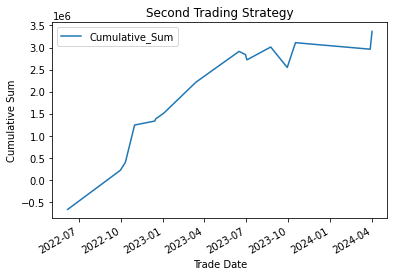

In [59]:
result_long_short.plot(x='Trade Date', y='Cumulative_Sum')
plt.xlabel("Trade Date")
plt.ylabel("Cumulative Sum")

plt.title("Second Trading Strategy")

plt.savefig('result_long_short_graph.pdf')
plt.show()

For the Third trading strategy, we shall need to compare % increse for each stock to % increase for SP500 during the same time period. First we print out the dates of Announcement date and Trade Date.

In [60]:
df_spy = pd.DataFrame()
df_spy['Announced Day'] = df_sorted_500['Announced']
df_spy['Traded Day'] = df_sorted_500['Trade Date']
#df_spy['SPY']
df_spy

,Announced Day,Traded Day
0,10/13/2023,10/17/2023
1,9/28/2023,9/29/2023
2,3/13/2023,3/14/2023
3,9/28/2023,9/29/2023
4,8/21/2023,8/24/2023
5,3/27/2024,4/1/2024
6,10/6/2022,10/11/2022
7,10/27/2022,10/31/2022
8,6/28/2023,6/30/2023
9,12/28/2022,1/3/2023


Now, for each line in the previous dataframe, we look up (using yfinance), the SP500 prices on Announcement date, on Trade Date, on a date a week after Trade Date.

In [61]:
spy1 =[431.5, 428.52, 385.36, 428.52, 439.34, 523.17, 373.20, 379.98, 436.39, 376.66, 436.39, 385.91, 396.49, 398.95, 398.95, 427.10, 410.54, 367.95]
spy2 = [436.02, 427.48, 391.73, 427.48, 436.89, 522.16, 357.74, 386.21, 443.28, 380.82, 443.79, 391.73, 395.6, 399.4, 383.27, 439.46, 415.74, 357.18]
spy3 = [423.63, 424.50, 398.91, 424.50, 450.35,  518.72, 371.13, 379.95, 438.55, 390.58, 439.66, 398.91, 410.95, 386.23, 382.91, 433.21, 373.87, 362.79]

The column 'SPY on Announcement' shows SP500 price on Announcement date, the column 'SPY on Trade' shows SP500 price on trade date, the column 'SPY Week after Trade' shows SP500 price a week after trade date.

In [62]:
df_sorted_500['SPY on Announcement'] = spy1
df_sorted_500['SPY on Trade'] = spy2
df_sorted_500['SPY Week after Trade'] = spy3
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/1628716734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['SPY on Announcement'] = spy1
/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/1628716734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['SPY on Trade'] = spy2
/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/1628716734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Sign,$Gain Week After,Max Shares to Short,Shares Short,Gain on 1% ADV Short,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,1.0,9.57,11866.130673,11866.130673,113558.870538,5336.007545,108222.862993,431.50,436.02,423.63
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,-1.0,-10.11,28973.509934,28973.509934,-292922.185430,3330.182527,-296252.367958,428.52,427.48,424.50
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,1.0,7.42,23418.084496,23418.084496,173762.186962,2743.841142,171018.345820,385.36,391.73,398.91
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,-1.0,-4.29,166893.732970,28423.000000,-121934.670000,3319.172329,-125253.842329,428.52,427.48,424.50
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,1.0,0.70,207100.591716,207100.591716,144970.414201,9240.696766,135729.717435,439.34,436.89,450.35
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,1.0,12.06,17251.091396,17251.091396,208048.162231,2894.364294,205153.797937,523.17,522.16,518.72
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,1.0,-2.01,57309.941520,14538.785700,-29222.959257,3577.131878,-32800.091135,373.20,357.74,371.13
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,1.0,1.27,56529.764652,23406.466000,29726.211820,3754.485484,25971.726336,379.98,386.21,379.95
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,-1.0,-1.79,72037.635989,34542.000000,-61830.180000,3340.867397,-65171.047397,436.39,443.28,438.55
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,-1.0,4.00,87500.000000,58198.000000,232792.000000,5674.644932,227117.355068,376.66,380.82,390.58


We calculate % increase in SP500 price between Announcement date and Trade Date and store it in 'SPY %increase on Trade' column. We calculate % increase in SP500 price between Trade Date and a date a week after Trade Date and store it in 'SPY %increase Week after Trade' column.

In [63]:
df_sorted_500['SPY %increase on Trade'] = (df_sorted_500['SPY on Trade'] - df_sorted_500['SPY on Announcement'])/df_sorted_500['SPY on Announcement']
df_sorted_500['SPY %increase Week after Trade'] = ( df_sorted_500['SPY on Announcement'] - df_sorted_500['SPY Week after Trade'] )/df_sorted_500['SPY Week after Trade']
df_sorted_500


/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2711682172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['SPY %increase on Trade'] = (df_sorted_500['SPY on Trade'] - df_sorted_500['SPY on Announcement'])/df_sorted_500['SPY on Announcement']
/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2711682172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['SPY %increase Week after Trade'] = ( df_sorted_500['SPY on Announcement'] - df_sorted_500['

,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Max Shares to Short,Shares Short,Gain on 1% ADV Short,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,11866.130673,11866.130673,113558.870538,5336.007545,108222.862993,431.50,436.02,423.63,0.010475,0.018578
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,28973.509934,28973.509934,-292922.185430,3330.182527,-296252.367958,428.52,427.48,424.50,-0.002427,0.009470
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,23418.084496,23418.084496,173762.186962,2743.841142,171018.345820,385.36,391.73,398.91,0.016530,-0.033968
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,166893.732970,28423.000000,-121934.670000,3319.172329,-125253.842329,428.52,427.48,424.50,-0.002427,0.009470
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,207100.591716,207100.591716,144970.414201,9240.696766,135729.717435,439.34,436.89,450.35,-0.005577,-0.024448
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,17251.091396,17251.091396,208048.162231,2894.364294,205153.797937,523.17,522.16,518.72,-0.001931,0.008579
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,57309.941520,14538.785700,-29222.959257,3577.131878,-32800.091135,373.20,357.74,371.13,-0.041426,0.005578
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,56529.764652,23406.466000,29726.211820,3754.485484,25971.726336,379.98,386.21,379.95,0.016396,0.000079
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,72037.635989,34542.000000,-61830.180000,3340.867397,-65171.047397,436.39,443.28,438.55,0.015789,-0.004925
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,87500.000000,58198.000000,232792.000000,5674.644932,227117.355068,376.66,380.82,390.58,0.011044,-0.035639


We calculate % increase in stock price between Announcement date and Trade Date and store it in 'Stock %increase on Trade' column.

In [64]:
df_sorted_500['Stock %increase on Trade'] = df_sorted_500['$Gain']/df_sorted_500['Announcement Px']
df_sorted_500
#df_sorted_500['Stock %increase Week after Trade'] = 

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/606259222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Stock %increase on Trade'] = df_sorted_500['$Gain']/df_sorted_500['Announcement Px']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Shares Short,Gain on 1% ADV Short,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,11866.130673,113558.870538,5336.007545,108222.862993,431.50,436.02,423.63,0.010475,0.018578,0.093331
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,28973.509934,-292922.185430,3330.182527,-296252.367958,428.52,427.48,424.50,-0.002427,0.009470,-0.001063
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,23418.084496,173762.186962,2743.841142,171018.345820,385.36,391.73,398.91,0.016530,-0.033968,0.144764
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,28423.000000,-121934.670000,3319.172329,-125253.842329,428.52,427.48,424.50,-0.002427,0.009470,-0.082500
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,207100.591716,144970.414201,9240.696766,135729.717435,439.34,436.89,450.35,-0.005577,-0.024448,0.033188
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,17251.091396,208048.162231,2894.364294,205153.797937,523.17,522.16,518.72,-0.001931,0.008579,0.082057
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,14538.785700,-29222.959257,3577.131878,-32800.091135,373.20,357.74,371.13,-0.041426,0.005578,0.213799
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,23406.466000,29726.211820,3754.485484,25971.726336,379.98,386.21,379.95,0.016396,0.000079,0.676920
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,34542.000000,-61830.180000,3340.867397,-65171.047397,436.39,443.28,438.55,0.015789,-0.004925,-0.007297
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,58198.000000,232792.000000,5674.644932,227117.355068,376.66,380.82,390.58,0.011044,-0.035639,-0.026087


The 'indicator' tells us if the % gain of the stock between Announcement date and Trade Date was greater than % gain of SP500. If stock increase was greater, then indicator = 1, if not, then indicator = -1.

In [65]:

df_sorted_500['indicator'] = df_sorted_500.apply(lambda row: 1 if row['Stock %increase on Trade'] > row['SPY %increase on Trade'] else -1, axis=1)
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/3125741333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['indicator'] = df_sorted_500.apply(lambda row: 1 if row['Stock %increase on Trade'] > row['SPY %increase on Trade'] else -1, axis=1)


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Gain on 1% ADV Short,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,113558.870538,5336.007545,108222.862993,431.50,436.02,423.63,0.010475,0.018578,0.093331,1
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,-292922.185430,3330.182527,-296252.367958,428.52,427.48,424.50,-0.002427,0.009470,-0.001063,1
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,173762.186962,2743.841142,171018.345820,385.36,391.73,398.91,0.016530,-0.033968,0.144764,1
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,-121934.670000,3319.172329,-125253.842329,428.52,427.48,424.50,-0.002427,0.009470,-0.082500,-1
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,144970.414201,9240.696766,135729.717435,439.34,436.89,450.35,-0.005577,-0.024448,0.033188,1
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,208048.162231,2894.364294,205153.797937,523.17,522.16,518.72,-0.001931,0.008579,0.082057,1
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,-29222.959257,3577.131878,-32800.091135,373.20,357.74,371.13,-0.041426,0.005578,0.213799,1
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,29726.211820,3754.485484,25971.726336,379.98,386.21,379.95,0.016396,0.000079,0.676920,1
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,-61830.180000,3340.867397,-65171.047397,436.39,443.28,438.55,0.015789,-0.004925,-0.007297,-1
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,232792.000000,5674.644932,227117.355068,376.66,380.82,390.58,0.011044,-0.035639,-0.026087,-1


This strategy assumes that for the week after the Trade Date the stock would outperform SP500 if it did between Announcement date and Trade Date, and that the stock would underperform SP500 for the week after Trade Date if it did between Announcement date and Trade Date.

If the stock outperformed SP500 before Trade Date, we buy it on Trade Date and hold it for a week. If the stock underperformed SP500 before Trade Date, we short it on Trade Date and hold the position for a week.

If the 'Indicator' shows that the stock had outperformed SP500, we buy it, otherwise we short it.
'$Gain Week After' shows gain per share.

In [66]:
df_sorted_500['$Gain Week After'] =  df_sorted_500['indicator']*( df_sorted_500['Week After Trade PX'] - df_sorted_500['Trade PX'] )
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/3491735760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['$Gain Week After'] =  df_sorted_500['indicator']*( df_sorted_500['Week After Trade PX'] - df_sorted_500['Trade PX'] )


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Gain on 1% ADV Short,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,113558.870538,5336.007545,108222.862993,431.50,436.02,423.63,0.010475,0.018578,0.093331,1
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,-292922.185430,3330.182527,-296252.367958,428.52,427.48,424.50,-0.002427,0.009470,-0.001063,1
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,173762.186962,2743.841142,171018.345820,385.36,391.73,398.91,0.016530,-0.033968,0.144764,1
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,-121934.670000,3319.172329,-125253.842329,428.52,427.48,424.50,-0.002427,0.009470,-0.082500,-1
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,144970.414201,9240.696766,135729.717435,439.34,436.89,450.35,-0.005577,-0.024448,0.033188,1
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,208048.162231,2894.364294,205153.797937,523.17,522.16,518.72,-0.001931,0.008579,0.082057,1
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,-29222.959257,3577.131878,-32800.091135,373.20,357.74,371.13,-0.041426,0.005578,0.213799,1
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,29726.211820,3754.485484,25971.726336,379.98,386.21,379.95,0.016396,0.000079,0.676920,1
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,-61830.180000,3340.867397,-65171.047397,436.39,443.28,438.55,0.015789,-0.004925,-0.007297,-1
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,232792.000000,5674.644932,227117.355068,376.66,380.82,390.58,0.011044,-0.035639,-0.026087,-1


The idea behind the Third strategy is to split 4,900,000 evenly between the stock and SP500.

We spend exactly half on buying/shorting shares, so we allocate 2,450,000 to buy/short shares. If two stocks were added to SP500 at the same time, then we allocate half of the amount to each stock. The number of shares we buy is minimum of max number of shares we can buy with 2,450,000 and of 1% of ADV. 

The column 'Max Shares to Short' contains max number of shares which can be bought with 2,450,000 (divided by 2 if two stocks were added). The column 'Shares Short' contains the minimum of 1% ADV for the stock and max number of shares we can buy for the stock.

We calculate 'Gain on 1% ADV Short' = the total gain on all the shares we bought/shorted by multiplying number of shares by gain on each bought/shorted share.

In [67]:
df_sorted_500['Max Shares to Short'] = 2450000/(df_sorted_500['Trade PX'] * df_sorted_500['double'])
df_sorted_500['Shares Short'] = df_sorted_500.apply(lambda row: min(0.01*row['ADV'], row['Max Shares to Short']), axis=1)
df_sorted_500['Gain on 1% ADV Short'] = df_sorted_500['$Gain Week After']*df_sorted_500['Shares Short']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/640545935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Max Shares to Short'] = 2450000/(df_sorted_500['Trade PX'] * df_sorted_500['double'])
/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/640545935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Shares Short'] = df_sorted_500.apply(lambda row: min(0.01*row['ADV'], row['Max Shares to Short']), axis=1)
/var/folders/p8/d6td9k4s2tndwtwl8kg

,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Gain on 1% ADV Short,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,-56779.435269,5336.007545,108222.862993,431.50,436.02,423.63,0.010475,0.018578,0.093331,1
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,-146461.092715,3330.182527,-296252.367958,428.52,427.48,424.50,-0.002427,0.009470,-0.001063,1
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,-86881.093481,2743.841142,171018.345820,385.36,391.73,398.91,0.016530,-0.033968,0.144764,1
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,121934.670000,3319.172329,-125253.842329,428.52,427.48,424.50,-0.002427,0.009470,-0.082500,-1
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,-72485.207101,9240.696766,135729.717435,439.34,436.89,450.35,-0.005577,-0.024448,0.033188,1
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,-104024.081115,2894.364294,205153.797937,523.17,522.16,518.72,-0.001931,0.008579,0.082057,1
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,29222.959257,3577.131878,-32800.091135,373.20,357.74,371.13,-0.041426,0.005578,0.213799,1
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,-29726.211820,3754.485484,25971.726336,379.98,386.21,379.95,0.016396,0.000079,0.676920,1
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,61830.180000,3340.867397,-65171.047397,436.39,443.28,438.55,0.015789,-0.004925,-0.007297,-1
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,-175000.000000,5674.644932,227117.355068,376.66,380.82,390.58,0.011044,-0.035639,-0.026087,-1


We can calculate the total gain on short strategy.

In [68]:
df_sorted_500['Gain on 1% ADV Short'].sum()

380746.40842226904

As we can see, buying if the stock outperforms SP500 and selling if the stock underperforms SP500 gives a slightly better result than buying if the stock lost between Announcement Date and Trade Date and selling if the stock gained between Announcement Date and Trade Date (accounting for investing only 2,450,000 the Second strategy gives 654379.96/2 = 327189.98 in profits (before costs were subtracted) for the week after Trade Date). 

Now we hedge with SP500. We use 2,450,000 to short/buy shares that mimic SP500 in the opposite direction to what we did for the stock. If we shorted the stock, we buy SP500; if we bought the stock, we short SP500. The idea is that if the stock outperformed SP500, but the market went down, shorting SP500 would cancel the down market movement. Bying/shorting SP500 in the direction opposite to the stock results in effectively subtracting all the market movements.

In [69]:
df_sorted_500['$Gain on SPY'] = -1*df_sorted_500['indicator']*2450000*df_sorted_500['SPY %increase on Trade']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/4100709037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['$Gain on SPY'] = -1*df_sorted_500['indicator']*2450000*df_sorted_500['SPY %increase on Trade']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator,$Gain on SPY
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,5336.007545,108222.862993,431.50,436.02,423.63,0.010475,0.018578,0.093331,1,-25663.962920
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,3330.182527,-296252.367958,428.52,427.48,424.50,-0.002427,0.009470,-0.001063,1,5946.046859
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,2743.841142,171018.345820,385.36,391.73,398.91,0.016530,-0.033968,0.144764,1,-40498.494914
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,3319.172329,-125253.842329,428.52,427.48,424.50,-0.002427,0.009470,-0.082500,-1,-5946.046859
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,9240.696766,135729.717435,439.34,436.89,450.35,-0.005577,-0.024448,0.033188,1,13662.539263
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,2894.364294,205153.797937,523.17,522.16,518.72,-0.001931,0.008579,0.082057,1,4729.820135
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,3577.131878,-32800.091135,373.20,357.74,371.13,-0.041426,0.005578,0.213799,1,101492.497320
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,3754.485484,25971.726336,379.98,386.21,379.95,0.016396,0.000079,0.676920,1,-40169.219433
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,3340.867397,-65171.047397,436.39,443.28,438.55,0.015789,-0.004925,-0.007297,-1,38682.142121
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,5674.644932,227117.355068,376.66,380.82,390.58,0.011044,-0.035639,-0.026087,-1,27058.885998


Let us find cumulative gain of long/short SP500 portfolio for a week after Trade Date going in the opposite direction from the stock (i.e. short stock and long SP500; or long stock and short SP500).

In [70]:
df_sorted_500['$Gain on SPY'].sum()

203763.4006132074

As we see, SP500 makes smaller total profits than the stocks.

Now we factor in carry cost for all bought/shorted shares of Stock for one week after Trade Date and 0.01 transaction cost for trading each share.

In [71]:
df_sorted_500['Cost Short'] = 2450000*((df_sorted_500['FFERate']+0.0125 + 0.0025*df_sorted_500['indicator'])/365)*6/df_sorted_500['double'] + 2*0.01*df_sorted_500['Shares Short']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/2824309602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Cost Short'] = 2450000*((df_sorted_500['FFERate']+0.0125 + 0.0025*df_sorted_500['indicator'])/365)*6/df_sorted_500['double'] + 2*0.01*df_sorted_500['Shares Short']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator,$Gain on SPY
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,2869.373635,108222.862993,431.50,436.02,423.63,0.010475,0.018578,0.093331,1,-25663.962920
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,1665.091264,-296252.367958,428.52,427.48,424.50,-0.002427,0.009470,-0.001063,1,5946.046859
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,1472.605502,171018.345820,385.36,391.73,398.91,0.016530,-0.033968,0.144764,1,-40498.494914
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,1843.131233,-125253.842329,428.52,427.48,424.50,-0.002427,0.009470,-0.082500,-1,-5946.046859
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,4821.718246,135729.717435,439.34,436.89,450.35,-0.005577,-0.024448,0.033188,1,13662.539263
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,1547.867078,205153.797937,523.17,522.16,518.72,-0.001931,0.008579,0.082057,1,4729.820135
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,2135.323659,-32800.091135,373.20,357.74,371.13,-0.041426,0.005578,0.213799,1,101492.497320
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,2312.677265,25971.726336,379.98,386.21,379.95,0.016396,0.000079,0.676920,1,-40169.219433
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,1915.168767,-65171.047397,436.39,443.28,438.55,0.015789,-0.004925,-0.007297,-1,38682.142121
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,2928.972603,227117.355068,376.66,380.82,390.58,0.011044,-0.035639,-0.026087,-1,27058.885998


We calculate the total gain minus carry/transaction cost for trading stock shares the week after Trade Date and store the result in '$Gain on Short' column.

In [72]:
df_sorted_500['$Gain on Short'] = df_sorted_500['Gain on 1% ADV Short'] - df_sorted_500['Cost Short']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/468953250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['$Gain on Short'] = df_sorted_500['Gain on 1% ADV Short'] - df_sorted_500['Cost Short']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,Cost Short,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator,$Gain on SPY
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,2869.373635,-59648.808905,431.50,436.02,423.63,0.010475,0.018578,0.093331,1,-25663.962920
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,1665.091264,-148126.183979,428.52,427.48,424.50,-0.002427,0.009470,-0.001063,1,5946.046859
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,1472.605502,-88353.698984,385.36,391.73,398.91,0.016530,-0.033968,0.144764,1,-40498.494914
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,1843.131233,120091.538767,428.52,427.48,424.50,-0.002427,0.009470,-0.082500,-1,-5946.046859
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,4821.718246,-77306.925347,439.34,436.89,450.35,-0.005577,-0.024448,0.033188,1,13662.539263
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,1547.867078,-105571.948194,523.17,522.16,518.72,-0.001931,0.008579,0.082057,1,4729.820135
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,2135.323659,27087.635598,373.20,357.74,371.13,-0.041426,0.005578,0.213799,1,101492.497320
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,2312.677265,-32038.889085,379.98,386.21,379.95,0.016396,0.000079,0.676920,1,-40169.219433
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,1915.168767,59915.011233,436.39,443.28,438.55,0.015789,-0.004925,-0.007297,-1,38682.142121
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,2928.972603,-177928.972603,376.66,380.82,390.58,0.011044,-0.035639,-0.026087,-1,27058.885998


We calculate the cost of keeping short/long SP500 portfolio for a week and transaction costs.

In [73]:
df_sorted_500['Cost SPY'] = 2450000*((df_sorted_500['FFERate']+0.0125 - 0.0025*df_sorted_500['indicator'])/365)*6/df_sorted_500['double'] + 2*0.01*2450000/(df_sorted_500['SPY on Trade']*df_sorted_500['double'])
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/3000696032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Cost SPY'] = 2450000*((df_sorted_500['FFERate']+0.0125 - 0.0025*df_sorted_500['indicator'])/365)*6/df_sorted_500['double'] + 2*0.01*2450000/(df_sorted_500['SPY on Trade']*df_sorted_500['double'])


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,$Gain on Short,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator,$Gain on SPY,Cost SPY
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,-59648.808905,431.50,436.02,423.63,0.010475,0.018578,0.093331,1,-25663.962920,2661.722632
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,-148126.183979,428.52,427.48,424.50,-0.002427,0.009470,-0.001063,1,5946.046859,1331.983856
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,-88353.698984,385.36,391.73,398.91,0.016530,-0.033968,0.144764,1,-40498.494914,1200.282804
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,120091.538767,428.52,427.48,424.50,-0.002427,0.009470,-0.082500,-1,-5946.046859,1432.668787
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,-77306.925347,439.34,436.89,450.35,-0.005577,-0.024448,0.033188,1,13662.539263,2661.498844
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,-105571.948194,523.17,522.16,518.72,-0.001931,0.008579,0.082057,1,4729.820135,1321.591717
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,27087.635598,373.20,357.74,371.13,-0.041426,0.005578,0.213799,1,101492.497320,1780.149067
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,-32038.889085,379.98,386.21,379.95,0.016396,0.000079,0.676920,1,-40169.219433,1770.052063
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,59915.011233,436.39,443.28,438.55,0.015789,-0.004925,-0.007297,-1,38682.142121,1380.283506
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,-177928.972603,376.66,380.82,390.58,0.011044,-0.035639,-0.026087,-1,27058.885998,2384.012178


Now we calculate the total gain on SP500 by subtracting the cost of holding SP500 portfolio for a week from the profit on SP500 portfolio from Trade Date to a date a week after. We store the result in 'Gain - Cost SPY' column.

In [74]:
df_sorted_500['Gain - Cost SPY'] = df_sorted_500['$Gain on SPY'] - df_sorted_500['Cost SPY']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/592355389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['Gain - Cost SPY'] = df_sorted_500['$Gain on SPY'] - df_sorted_500['Cost SPY']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,SPY on Announcement,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator,$Gain on SPY,Cost SPY,Gain - Cost SPY
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,431.50,436.02,423.63,0.010475,0.018578,0.093331,1,-25663.962920,2661.722632,-28325.685552
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,428.52,427.48,424.50,-0.002427,0.009470,-0.001063,1,5946.046859,1331.983856,4614.063003
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,385.36,391.73,398.91,0.016530,-0.033968,0.144764,1,-40498.494914,1200.282804,-41698.777718
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,428.52,427.48,424.50,-0.002427,0.009470,-0.082500,-1,-5946.046859,1432.668787,-7378.715646
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,439.34,436.89,450.35,-0.005577,-0.024448,0.033188,1,13662.539263,2661.498844,11001.040420
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,523.17,522.16,518.72,-0.001931,0.008579,0.082057,1,4729.820135,1321.591717,3408.228418
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,373.20,357.74,371.13,-0.041426,0.005578,0.213799,1,101492.497320,1780.149067,99712.348254
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,379.98,386.21,379.95,0.016396,0.000079,0.676920,1,-40169.219433,1770.052063,-41939.271495
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,436.39,443.28,438.55,0.015789,-0.004925,-0.007297,-1,38682.142121,1380.283506,37301.858615
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,376.66,380.82,390.58,0.011044,-0.035639,-0.026087,-1,27058.885998,2384.012178,24674.873820


Now we can add the total gain on the stock to the total gain on SP500 hedge. We store the result in '$Gain Stock and SPY' column.

In [75]:
df_sorted_500['$Gain Stock and SPY'] = df_sorted_500['$Gain on Short'] + df_sorted_500['Gain - Cost SPY']
df_sorted_500

/var/folders/p8/d6td9k4s2tndwtwl8kgnh7zw0000gn/T/ipykernel_40127/900748697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_500['$Gain Stock and SPY'] = df_sorted_500['$Gain on Short'] + df_sorted_500['Gain - Cost SPY']


,index,Announced,Trade Date,Index Change,Ticker,Action,Last Px,Sector,Shs to Trade,$MM to Trade,...,SPY on Trade,SPY Week after Trade,SPY %increase on Trade,SPY %increase Week after Trade,Stock %increase on Trade,indicator,$Gain on SPY,Cost SPY,Gain - Cost SPY,$Gain Stock and SPY
0,32,10/13/2023,10/17/2023,S&P 500,LULU US,Add,$377.69,Cons Disc,"20,154,161","7,612.00",...,436.02,423.63,0.010475,0.018578,0.093331,1,-25663.962920,2661.722632,-28325.685552,-87974.494456
1,36,9/28/2023,9/29/2023,S&P 500,VLTO* US,Add,$84.65,Cons Disc,-,-,...,427.48,424.50,-0.002427,0.009470,-0.001063,1,5946.046859,1331.983856,4614.063003,-143512.120976
2,97,3/13/2023,3/14/2023,S&P 500,BG US,Add,$91.39,Cons Stap,"26,063,253","2,381.90",...,391.73,398.91,0.016530,-0.033968,0.144764,1,-40498.494914,1200.282804,-41698.777718,-130052.476702
3,37,9/28/2023,9/29/2023,S&P 500,KLG* US,Add,$16.00,Cons Stap,-,-,...,427.48,424.50,-0.002427,0.009470,-0.082500,-1,-5946.046859,1432.668787,-7378.715646,112712.823121
4,42,8/21/2023,8/24/2023,S&P 500,KVUE US,Add,$22.90,Cons Stap,"300,389,422","6,878.90",...,436.89,450.35,-0.005577,-0.024448,0.033188,1,13662.539263,2661.498844,11001.040420,-66305.884927
5,13,3/27/2024,4/1/2024,S&P 500,GEV-W US,Add,$131.25,Energy,-,-,...,522.16,518.72,-0.001931,0.008579,0.082057,1,4729.820135,1321.591717,3408.228418,-102163.719776
6,121,10/6/2022,10/11/2022,S&P 500,TRGP,Add,$70.44,Energy,"39,511,541",-,...,357.74,371.13,-0.041426,0.005578,0.213799,1,101492.497320,1780.149067,99712.348254,126799.983852
7,117,10/27/2022,10/31/2022,S&P 500,ACGL,Add,$51.69,Financials,"64,232,791","$3,320.20",...,386.21,379.95,0.016396,0.000079,0.676920,1,-40169.219433,1770.052063,-41939.271495,-73978.160580
8,51,6/28/2023,6/30/2023,S&P 500,FTREV US,Add,$34.26,Healthcare,-,-,...,443.28,438.55,0.015789,-0.004925,-0.007297,-1,38682.142121,1380.283506,37301.858615,97216.869848
9,105,12/28/2022,1/3/2023,S&P 500,GEHCV US,Add,$57.50,Healthcare,-,-,...,380.82,390.58,0.011044,-0.035639,-0.026087,-1,27058.885998,2384.012178,24674.873820,-153254.098783


If we add up all the values in the column '$Gain Stock and SPY' we get the total profit from this strategy.

In [76]:
df_sorted_500['$Gain Stock and SPY'].sum()

512877.35231168725

Now we can put the results of this strategy into the dataframe df_profit which tracks profits as a function of the trade date. We calculate the total gain  by adding gain from long trade between Announcement date and Trade Date and gain from SP500 hedged trade between Trade Date and a date a week after. We store the result in 'Total Gain' column.

In [77]:
df_profit['$Gain on Short'] = df_sorted_500['$Gain Stock and SPY']
df_profit.rename(columns={'$Gain on Short': '$Gain Stock and SPY'}, inplace=True)
df_profit['Total Gain'] = df_profit['$Gain on Long'] + df_profit['$Gain Stock and SPY']
df_profit

,Trade Date,$Gain on Long,$Gain Stock and SPY,Total Gain
0,2023-10-17 00:00:00,453392.406332,-87974.494456,365417.911875
1,2023-09-29 00:00:00,-3642.149633,-143512.120976,-147154.270609
2,2023-03-14 00:00:00,353723.311706,-130052.476702,223670.835005
3,2023-09-29 00:00:00,-38545.272055,112712.823121,74167.551066
4,2023-08-24 00:00:00,155589.899025,-66305.884927,89284.014098
5,2024-04-01 00:00:00,198374.406393,-102163.719776,96210.686617
6,2022-10-11 00:00:00,215589.090353,126799.983852,342389.074204
7,2022-10-31 00:00:00,816064.718760,-73978.160580,742086.558179
8,2023-06-30 00:00:00,-10209.682466,97216.869848,87007.187382
9,2023-01-03 00:00:00,-92971.644932,-153254.098783,-246225.743715


We calculate the total profit made by the Third strategy.

In [78]:
df_profit['Total Gain'].sum()

3303340.4172119284

We add together rows that correspond to the same Trade Date. For simplicity of presentation, we assume that transactions that happened on Annoncement date happen on Trade Date (on the graph they are too close to tell the difference). We calculate the cumulative sum of the 'Total Gain' and store it in the 'Cumulative_Sum' column.

In [79]:
result_spy_hedged = df_profit.groupby('Trade Date')['Total Gain'].sum().reset_index()
result_spy_hedged['Cumulative_Sum'] = result_spy_hedged['Total Gain'].cumsum()
result_spy_hedged

,Trade Date,Total Gain,Cumulative_Sum
0,2022-06-07,275266.033052,2.752660e+05
1,2022-09-30,486535.375122,7.618014e+05
2,2022-10-11,342389.074204,1.104190e+06
3,2022-10-31,742086.558179,1.846277e+06
4,2022-12-14,-54610.284568,1.791667e+06
5,2022-12-16,183532.089278,1.975199e+06
6,2023-01-03,-246225.743715,1.728973e+06
7,2023-03-14,517536.441916,2.246510e+06
8,2023-06-16,548438.902408,2.794948e+06
9,2023-06-30,87007.187382,2.881956e+06


We export the dataframe into the pdf file.

In [80]:
# Create a PDF file
pdf = SimpleDocTemplate("result_spy_hedged.pdf", pagesize=letter)

# Create a table
table_data = [result_spy_hedged.columns.tolist()] + result_spy_hedged.values.tolist()
table = Table(table_data)

# Build the PDF
pdf.build([table])

We graph the 'Cumulative_Sum' as a function of Trade Date.

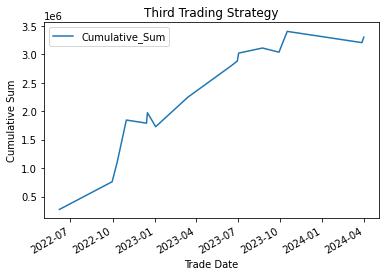

In [81]:
result_spy_hedged.plot(x='Trade Date', y='Cumulative_Sum')
plt.xlabel("Trade Date")
plt.ylabel("Cumulative Sum")

plt.title("Third Trading Strategy")

plt.savefig('result_hedged_spy_graph.pdf')
plt.show()

Below are some yfinance data used in the calculations done in this notebook

In [82]:
data_spy15 = yf.download("SPY", start="2022-09-23", end="2022-10-08")
data_spy15 = data_spy15[['Close']]
print(data_spy15)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2022-09-23  367.950012
2022-09-26  364.309998
2022-09-27  363.380005
2022-09-28  370.529999
2022-09-29  362.790009
2022-09-30  357.179993
2022-10-03  366.609985
2022-10-04  377.970001
2022-10-05  377.089996
2022-10-06  373.200012
2022-10-07  362.790009


In [83]:
data_spy14 = yf.download("SPY", start="2022-06-03", end="2022-06-15")
data_spy14 = data_spy14[['Close']]
print(data_spy14)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2022-06-03  410.540009
2022-06-06  411.790009
2022-06-07  415.739990
2022-06-08  411.220001
2022-06-09  401.440002
2022-06-10  389.799988
2022-06-13  375.000000
2022-06-14  373.869995


In [84]:
data_spy13 = yf.download("SPY", start="2023-06-05", end="2023-06-24")
data_spy13 = data_spy13[['Close']]
print(data_spy13)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2023-06-05  427.100006
2023-06-06  428.029999
2023-06-07  426.549988
2023-06-08  429.130005
2023-06-09  429.899994
2023-06-12  433.799988
2023-06-13  436.660004
2023-06-14  437.179993
2023-06-15  442.600006
2023-06-16  439.459991
2023-06-20  437.179993
2023-06-21  434.940002
2023-06-22  436.510010
2023-06-23  433.209991


In [85]:
data_spy12 = yf.download("SPY", start="2022-12-12", end="2022-12-27")
data_spy12 = data_spy12[['Close']]
print(data_spy12)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2022-12-12  398.950012
2022-12-13  401.970001
2022-12-14  399.399994
2022-12-15  389.630005
2022-12-16  383.269989
2022-12-19  380.019989
2022-12-20  380.540009
2022-12-21  386.230011
2022-12-22  380.720001
2022-12-23  382.910004


In [86]:
data_spy11 = yf.download("SPY", start="2023-03-27", end="2023-04-04")
data_spy11 = data_spy11[['Close']]
print(data_spy11)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2023-03-27  396.489990
2023-03-28  395.600006
2023-03-29  401.350006
2023-03-30  403.700012
2023-03-31  409.390015
2023-04-03  410.950012


In [87]:
data_spy10 = yf.download("SPY", start="2023-03-10", end="2023-03-22")
data_spy10 = data_spy10[['Close']]
print(data_spy10)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2023-03-10  385.910004
2023-03-13  385.359985
2023-03-14  391.730011
2023-03-15  389.279999
2023-03-16  396.109985
2023-03-17  389.989990
2023-03-20  393.739990
2023-03-21  398.910004


In [88]:
data_spy9 = yf.download("SPY", start="2022-12-28", end="2023-01-11")
data_spy9 = data_spy9[['Close']]
print(data_spy9)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2022-12-28  376.660004
2022-12-29  383.440002
2022-12-30  382.429993
2023-01-03  380.820007
2023-01-04  383.760010
2023-01-05  379.380005
2023-01-06  388.079987
2023-01-09  387.859985
2023-01-10  390.579987


In [89]:
data_spy8 = yf.download("SPY", start="2023-06-28", end="2023-07-11")
data_spy8 = data_spy8[['Close']]
print(data_spy8)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2023-06-28  436.390015
2023-06-29  438.109985
2023-06-30  443.279999
2023-07-03  443.790009
2023-07-05  443.130005
2023-07-06  439.660004
2023-07-07  438.549988
2023-07-10  439.660004


In [90]:
data_spy7 = yf.download("SPY", start="2022-10-27", end="2022-11-08")
data_spy7 = data_spy7[['Close']]
print(data_spy7)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2022-10-27  379.980011
2022-10-28  389.019989
2022-10-31  386.209991
2022-11-01  384.519989
2022-11-02  374.869995
2022-11-03  371.010010
2022-11-04  376.350006
2022-11-07  379.950012


In [91]:
data_spy6 = yf.download("SPY", start="2022-10-06", end="2022-10-19")
data_spy6 = data_spy6[['Close']]
print(data_spy6)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2022-10-06  373.200012
2022-10-07  362.790009
2022-10-10  360.019989
2022-10-11  357.739990
2022-10-12  356.559998
2022-10-13  365.970001
2022-10-14  357.630005
2022-10-17  366.820007
2022-10-18  371.130005


In [92]:
data_spy5 = yf.download("SPY", start="2024-03-27", end="2024-04-09")
data_spy5 = data_spy5[['Close']]
print(data_spy5)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2024-03-27  523.169983
2024-03-28  523.070007
2024-04-01  522.159973
2024-04-02  518.840027
2024-04-03  519.409973
2024-04-04  513.070007
2024-04-05  518.429993
2024-04-08  518.719971


In [93]:
data_spy4 = yf.download("SPY", start="2023-08-21", end="2023-09-01")
data_spy4 = data_spy4[['Close']]
print(data_spy4)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2023-08-21  439.339996
2023-08-22  438.149994
2023-08-23  443.029999
2023-08-24  436.890015
2023-08-25  439.970001
2023-08-28  442.760010
2023-08-29  449.160004
2023-08-30  451.010010
2023-08-31  450.350006


In [94]:
data_spy3 = yf.download("SPY", start="2023-03-13", end="2023-03-22")
data_spy3 = data_spy3[['Close']]
print(data_spy3)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2023-03-13  385.359985
2023-03-14  391.730011
2023-03-15  389.279999
2023-03-16  396.109985
2023-03-17  389.989990
2023-03-20  393.739990
2023-03-21  398.910004


In [95]:
data_spy2 = yf.download("SPY", start="2023-09-28", end="2023-10-6")
data_spy2 = data_spy2[['Close']]
print(data_spy2)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2023-09-28  428.519989
2023-09-29  427.480011
2023-10-02  427.309998
2023-10-03  421.589996
2023-10-04  424.660004
2023-10-05  424.500000


In [96]:
import yfinance as yf

data_spy1 = yf.download("SPY", start="2023-10-13", end="2023-10-25")
data_spy1 = data_spy1[['Close']]
print(data_spy1)


[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2023-10-13  431.500000
2023-10-16  436.040009
2023-10-17  436.019989
2023-10-18  430.209991
2023-10-19  426.429993
2023-10-20  421.190002
2023-10-23  420.459991
2023-10-24  423.630005


In [97]:
import yfinance as yf

data1 = yf.download("LULU", start="2023-10-12", end="2023-11-03")
data1 = data1[['Close', 'Volume']]
print(data1)
ADV = data1['Volume'].mean()
print(ADV)

[*********************100%%**********************]  1 of 1 completed

                 Close    Volume
Date                            
2023-10-12  373.940002   1250900
2023-10-13  377.690002   1941700
2023-10-16  416.640015  11454200
2023-10-17  412.940002  28064700
2023-10-18  405.609985   3750100
2023-10-19  396.190002   2628200
2023-10-20  395.820007   1937000
2023-10-23  402.459991   1827700
2023-10-24  403.369995   1575800
2023-10-25  396.700012   1309700
2023-10-26  388.619995   1837200
2023-10-27  386.820007   1448600
2023-10-30  391.750000   1005200
2023-10-31  393.480011   1084300
2023-11-01  395.290009   1312600
2023-11-02  403.500000   1390000
3988618.75


In [98]:
data2 = yf.download("BG", start="2023-3-12", end="2023-4-2")
data2 = data2[['Close', 'Volume']]
print(data2)
ADV = data2['Volume'].mean()
print(ADV)
#print(data2.head())

[*********************100%%**********************]  1 of 1 completed

                 Close    Volume
Date                            
2023-03-13   91.389999   1760600
2023-03-14  104.620003  39934100
2023-03-15   96.790001   6957200
2023-03-16   96.720001   2212300
2023-03-17   92.110001   3876800
2023-03-20   95.040001   2494300
2023-03-21   97.199997   1623100
2023-03-22   95.639999   1097600
2023-03-23   93.540001   1552900
2023-03-24   93.930000   1370900
2023-03-27   95.830002   1322000
2023-03-28   96.599998   1319000
2023-03-29   97.000000   1430400
2023-03-30   95.339996   1337400
2023-03-31   95.519997   1290300
4638593.333333333


In [99]:
data3 = yf.download("KVUE", start="2023-8-20", end="2023-9-10")
data3 = data3[['Close', 'Volume']]
print(data3)
ADV = data3['Volume'].mean()
print(ADV)

[*********************100%%**********************]  1 of 1 completed

                Close     Volume
Date                            
2023-08-21  22.900000  178017500
2023-08-22  23.740000   90558800
2023-08-23  23.620001  119406800
2023-08-24  23.660000  372341300
2023-08-25  22.969999   86974600
2023-08-28  22.969999   39395000
2023-08-29  22.860001   59445800
2023-08-30  23.070000   36094000
2023-08-31  23.049999   36119700
2023-09-01  22.959999   27565400
2023-09-05  22.610001   28465000
2023-09-06  22.379999   24727700
2023-09-07  20.990000  102648300
2023-09-08  21.299999   59635700
90099685.71428572


In [100]:
data4 = yf.download("TRGP", start="2023-10-6", end="2023-10-26")
data4 = data4[['Close', 'Volume']]
print(data4)
ADV = data4['Volume'].mean()
print(ADV)

[*********************100%%**********************]  1 of 1 completed

                Close   Volume
Date                          
2023-10-06  81.290001  1924600
2023-10-09  83.139999  1675600
2023-10-10  83.199997  1509900
2023-10-11  85.500000  1834200
2023-10-12  85.519997  1507800
2023-10-13  87.220001  1268300
2023-10-16  87.930000  1188100
2023-10-17  87.849998  1215100
2023-10-18  87.510002  1043200
2023-10-19  87.709999   938400
2023-10-20  86.690002  1486100
2023-10-23  86.400002  1656900
2023-10-24  85.489998  2112000
2023-10-25  85.349998   994100
1453878.5714285714


In [101]:
data5 = yf.download("ACGL", start="2023-10-27", end="2023-11-17")
data5 = data5[['Close', 'Volume']]
print(data5)
ADV = data5['Volume'].mean()
print(ADV)

[*********************100%%**********************]  1 of 1 completed

                Close   Volume
Date                          
2023-10-27  81.360001  1360200
2023-10-30  82.879997  1740900
2023-10-31  86.680000  2964500
2023-11-01  90.000000  4031500
2023-11-02  85.940002  3406800
2023-11-03  85.550003  2658800
2023-11-06  85.160004  2864300
2023-11-07  85.410004  1647800
2023-11-08  84.120003  1692300
2023-11-09  84.669998  2357600
2023-11-10  85.949997  2069600
2023-11-13  86.570000  1681100
2023-11-14  85.500000  1872700
2023-11-15  82.660004  2829100
2023-11-16  83.709999  1932500
2340646.6666666665


In [102]:
data6 = yf.download("PODD", start="2023-3-8", end="2023-3-28")
data6 = data6[['Close', 'Volume']]
print(data6)
ADV = data6['Volume'].mean()
print(ADV)

[*********************100%%**********************]  1 of 1 completed

                 Close    Volume
Date                            
2023-03-08  286.170013    256200
2023-03-09  283.119995    373500
2023-03-10  280.359985    760600
2023-03-13  303.440002   4429000
2023-03-14  312.769989  16412200
2023-03-15  307.890015   1605600
2023-03-16  312.359985    899700
2023-03-17  309.089996   1321900
2023-03-20  318.299988    922000
2023-03-21  326.029999    814400
2023-03-22  315.160004    839000
2023-03-23  311.489990    724400
2023-03-24  310.170013    444200
2023-03-27  314.929993    777400
2184292.8571428573


In [103]:
data7 = yf.download("FSLR", start="2022-12-11", end="2022-12-31")
data7 = data7[['Close', 'Volume']]
print(data7)
ADV = data7['Volume'].mean()
print(ADV)


[*********************100%%**********************]  1 of 1 completed

                 Close    Volume
Date                            
2022-12-12  150.279999   1769900
2022-12-13  157.080002   3214100
2022-12-14  160.089996   2727100
2022-12-15  159.410004   2743900
2022-12-16  155.080002  22634800
2022-12-19  156.770004   2856100
2022-12-20  156.589996   2185300
2022-12-21  162.059998   2532300
2022-12-22  156.889999   2095100
2022-12-23  156.750000   1027900
2022-12-27  150.220001   1955100
2022-12-28  146.169998   2773200
2022-12-29  148.779999   1447700
2022-12-30  149.789993   1438900
3671528.5714285714


In [104]:
data8 = yf.download("PANW", start="2023-6-4", end="2023-6-24")
data8 = data8[['Close', 'Volume']]
print(data8)
ADV = data8['Volume'].mean()
print(ADV)

[*********************100%%**********************]  1 of 1 completed

                 Close    Volume
Date                            
2023-06-05  226.789993  13772500
2023-06-06  224.720001   5401800
2023-06-07  216.250000   7175500
2023-06-08  222.820007   5031600
2023-06-09  220.100006   4969900
2023-06-12  229.139999   5424200
2023-06-13  233.630005   5957900
2023-06-14  238.559998   5658500
2023-06-15  243.800003   6482600
2023-06-16  246.529999  54813700
2023-06-20  241.600006   7910300
2023-06-21  238.919998   5316000
2023-06-22  249.149994   6490200
2023-06-23  243.940002   5667000
10005121.42857143


In [105]:
data9 = yf.download("VICI", start="2022-6-2", end="2022-6-22")
data9 = data9[['Close', 'Volume']]
print(data9)
ADV = data9['Volume'].mean()
print(ADV)

[*********************100%%**********************]  1 of 1 completed

                Close     Volume
Date                            
2022-06-02  31.420000   15305400
2022-06-03  31.389999   13982000
2022-06-06  32.450001   57119300
2022-06-07  32.110001  198882200
2022-06-08  31.459999   13388400
2022-06-09  30.680000    8525900
2022-06-10  29.940001   10565600
2022-06-13  28.600000   14163000
2022-06-14  28.129999   12096300
2022-06-15  29.270000   19125500
2022-06-16  28.760000   23740600
2022-06-17  28.809999   61550600
2022-06-21  29.860001   26138900
36506438.461538464


In [106]:
data10 = yf.download("PCG", start="2022-9-21", end="2022-10-11")
data10 = data10[['Close', 'Volume']]
print(data10)
ADV = data10['Volume'].mean()
print(ADV)

[*********************100%%**********************]  1 of 1 completed

            Close     Volume
Date                        
2022-09-21  13.01   14543600
2022-09-22  12.96   15052600
2022-09-23  12.61   20427900
2022-09-26  12.75   63874900
2022-09-27  12.41   40390400
2022-09-28  12.72   28302900
2022-09-29  12.38   36038800
2022-09-30  12.50  353648800
2022-10-03  13.11   47987900
2022-10-04  14.19   53672300
2022-10-05  14.75   94095900
2022-10-06  14.63   63378700
2022-10-07  14.93   38200700
2022-10-10  14.13   42317800
65138085.71428572
